# Pipeline
By Irene and Vivian

In [1]:
from utils import *
import fire_classifier
import material_classifier

plt.ion()   # interactive mode
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Fire

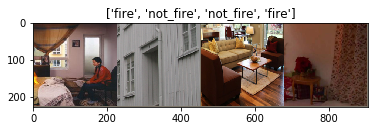

In [6]:
# load data
data_dir = './data/torch_fire_data'
dataloaders = fire_classifier.load(data_dir)

In [17]:
# Change the value of transfer to allow(True)/disallow(False) freezing all intermediate layers except the final FC
model_ft = fire_classifier.train(num_epochs=25, transfer=False)

Epoch 0/24
----------
train Loss: 0.3899 Acc: 0.8568
val Loss: 0.1956 Acc: 0.9263

Epoch 1/24
----------
train Loss: 0.2834 Acc: 0.8807
val Loss: 0.1300 Acc: 0.9526

Epoch 2/24
----------
train Loss: 0.3057 Acc: 0.8894
val Loss: 0.1347 Acc: 0.9421

Epoch 3/24
----------
train Loss: 0.3461 Acc: 0.8720
val Loss: 0.2861 Acc: 0.9000

Epoch 4/24
----------
train Loss: 0.2322 Acc: 0.9197
val Loss: 0.1021 Acc: 0.9526

Epoch 5/24
----------
train Loss: 0.2033 Acc: 0.9111
val Loss: 0.1248 Acc: 0.9526

Epoch 6/24
----------
train Loss: 0.2203 Acc: 0.9306
val Loss: 0.1149 Acc: 0.9632

Epoch 7/24
----------
train Loss: 0.2010 Acc: 0.9328
val Loss: 0.0973 Acc: 0.9632

Epoch 8/24
----------
train Loss: 0.2093 Acc: 0.9262
val Loss: 0.1012 Acc: 0.9632

Epoch 9/24
----------
train Loss: 0.1654 Acc: 0.9458
val Loss: 0.0859 Acc: 0.9737

Epoch 10/24
----------
train Loss: 0.1886 Acc: 0.9306
val Loss: 0.1355 Acc: 0.9474

Epoch 11/24
----------
train Loss: 0.2020 Acc: 0.9241
val Loss: 0.1075 Acc: 0.9579

Ep

In [ ]:
# save fire model
torch.save(model_ft, './model_fire.pt')

Visualize some predictions
predicted: not_fire; No Hazard


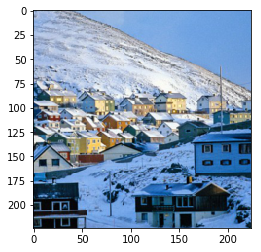

predicted: not_fire; No Hazard


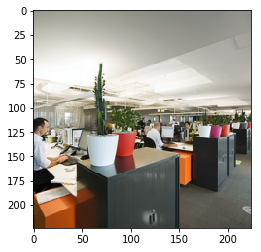

predicted: not_fire; No Hazard


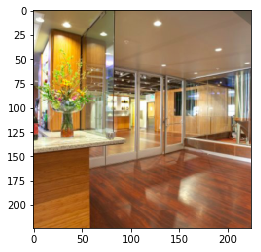

predicted: not_fire; No Hazard


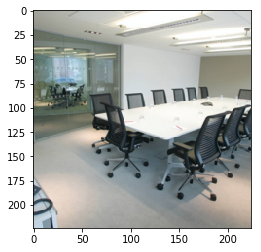

predicted: not_fire; No Hazard


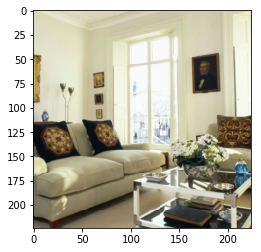

predicted: fire


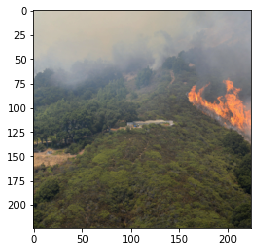

In [10]:
# visualize
model_ft = torch.load('./model_fire.pt')
fire_classifier.visualize(model_ft)

In [12]:
nb_classes = 2

# Confusion matrix
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_ft(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(torch.t(torch.t(confusion_matrix)/torch.sum(confusion_matrix, dim=1)))

# Percentage Accuracy for each class
# fire, non-fire
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([[0.8788, 0.1212],
        [0.0064, 0.9936]])
tensor([0.8788, 0.9936])


# Materials

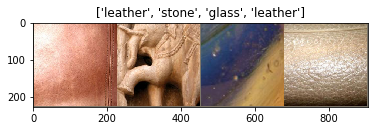

In [11]:
# load data
data_dir = './data/FMD'
dataloaders = material_classifier.load(data_dir)

In [12]:
# Change the value of transfer to allow(True)/disallow(False) freezing all intermediate layers except the final FC
model_ft = material_classifier.train(num_epochs=30, transfer=False)
baseline = model_ft

Epoch 0/29
----------
train Loss: 1.7357 Acc: 0.3449
val Loss: 1.2716 Acc: 0.5381

Epoch 1/29
----------
train Loss: 1.3414 Acc: 0.5102
val Loss: 0.8757 Acc: 0.7048

Epoch 2/29
----------
train Loss: 1.1496 Acc: 0.6082
val Loss: 0.7422 Acc: 0.7429

Epoch 3/29
----------
train Loss: 1.1048 Acc: 0.6020
val Loss: 0.7744 Acc: 0.7476

Epoch 4/29
----------
train Loss: 1.2584 Acc: 0.5673
val Loss: 0.9426 Acc: 0.7000

Epoch 5/29
----------
train Loss: 0.9697 Acc: 0.6490
val Loss: 0.7876 Acc: 0.7524

Epoch 6/29
----------
train Loss: 1.1002 Acc: 0.6122
val Loss: 1.2868 Acc: 0.6857

Epoch 7/29
----------
train Loss: 0.9395 Acc: 0.6653
val Loss: 0.7893 Acc: 0.7190

Epoch 8/29
----------
train Loss: 0.8469 Acc: 0.7224
val Loss: 0.8019 Acc: 0.7286

Epoch 9/29
----------
train Loss: 0.8307 Acc: 0.6898
val Loss: 0.7033 Acc: 0.7762

Epoch 10/29
----------
train Loss: 0.9109 Acc: 0.6816
val Loss: 0.7656 Acc: 0.7524

Epoch 11/29
----------
train Loss: 0.8805 Acc: 0.6673
val Loss: 0.8549 Acc: 0.7238

Ep

In [13]:
# Save model
torch.save(baseline, './model_baseline.pt')

Visualize some predictions
predicted: stone


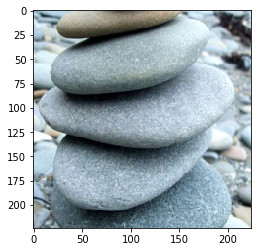

predicted: leather


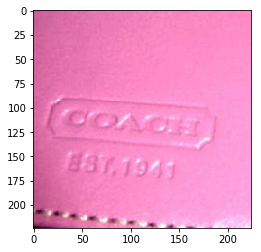

predicted: fabric


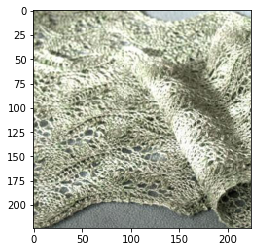

predicted: leather


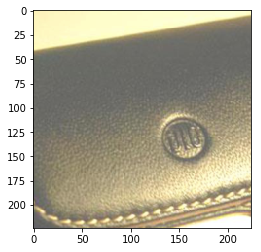

predicted: leather


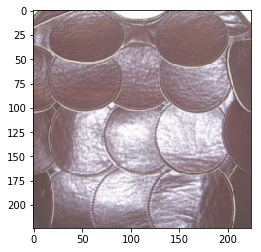

predicted: plastic


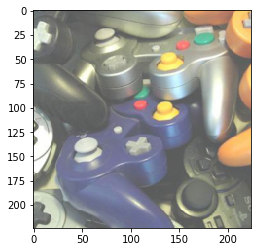

In [4]:
# visualize
# model_ft = torch.load('./model_baseline.pt')
material_classifier.visualize(model_ft)

## Transfer Learning for Fire Material

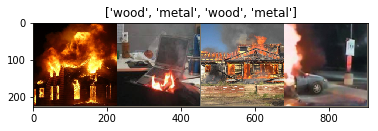

In [2]:
data_dir = './data/fire_new'
dataloaders = material_classifier.load(data_dir, load_baseline_model=True)

In [6]:
# Change the value of transfer to allow(True)/disallow(False) freezing all intermediate layers except the final FC
model_final = material_classifier.train(num_epochs=30, transfer=True, load_baseline_model=True)

Epoch 0/29
----------
train Loss: 1.3912 Acc: 0.2895
val Loss: 1.4236 Acc: 0.5000

Epoch 1/29
----------
train Loss: 1.1318 Acc: 0.6316
val Loss: 1.3004 Acc: 0.3889

Epoch 2/29
----------
train Loss: 1.0110 Acc: 0.6316
val Loss: 1.1460 Acc: 0.4444

Epoch 3/29
----------
train Loss: 0.6912 Acc: 0.8158
val Loss: 0.9129 Acc: 0.6111

Epoch 4/29
----------
train Loss: 0.6344 Acc: 0.7895
val Loss: 0.8804 Acc: 0.6111

Epoch 5/29
----------
train Loss: 0.6786 Acc: 0.7368
val Loss: 0.9321 Acc: 0.6667

Epoch 6/29
----------
train Loss: 0.5480 Acc: 0.8684
val Loss: 0.7958 Acc: 0.6111

Epoch 7/29
----------
train Loss: 0.5504 Acc: 0.8684
val Loss: 0.7757 Acc: 0.5556

Epoch 8/29
----------
train Loss: 0.4438 Acc: 0.8684
val Loss: 0.7879 Acc: 0.6111

Epoch 9/29
----------
train Loss: 0.5022 Acc: 0.8158
val Loss: 0.8136 Acc: 0.6667

Epoch 10/29
----------
train Loss: 0.4254 Acc: 0.8158
val Loss: 0.7890 Acc: 0.5556

Epoch 11/29
----------
train Loss: 0.3762 Acc: 0.8947
val Loss: 0.8121 Acc: 0.5556

Ep

In [5]:
# Save model
torch.save(model_final, './model_final_new.pt')

Visualize some predictions
predicted: wood; High Hazard


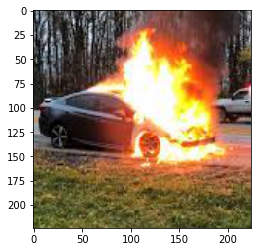

predicted: wood; High Hazard


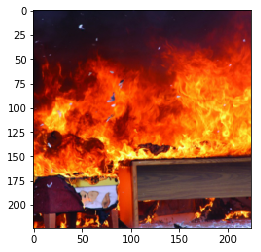

predicted: stone; Moderate Hazard


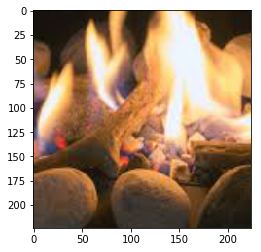

predicted: wood; High Hazard


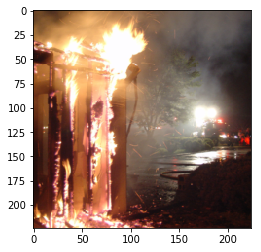

predicted: wood; High Hazard


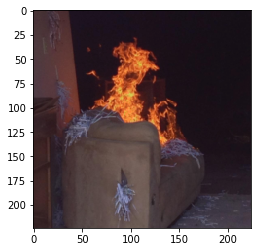

predicted: fabric; High Hazard


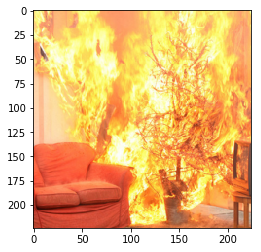

predicted: metal; Moderate Hazard


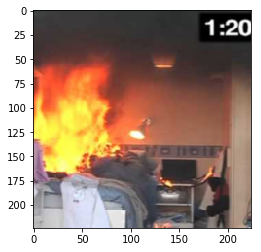

predicted: fabric; High Hazard


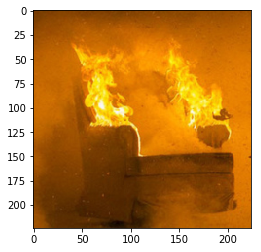

predicted: fabric; High Hazard


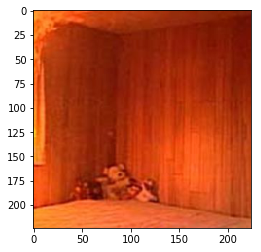

predicted: metal; Moderate Hazard


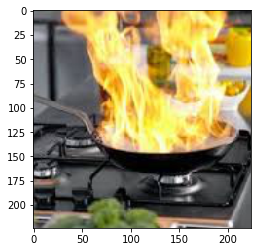

predicted: stone; Moderate Hazard


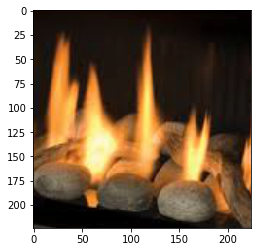

predicted: wood; High Hazard


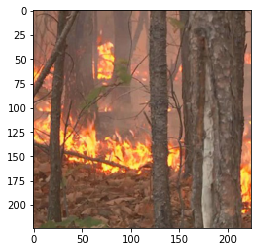

predicted: wood; High Hazard


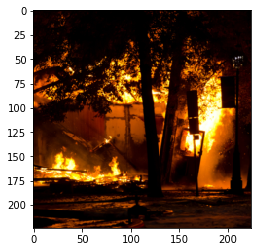

predicted: wood; High Hazard


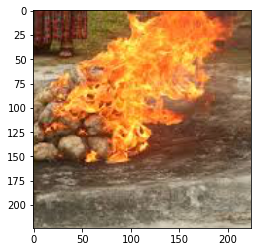

predicted: metal; Moderate Hazard


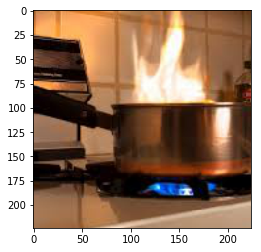

predicted: stone; Moderate Hazard


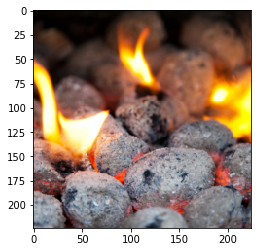

predicted: wood; High Hazard


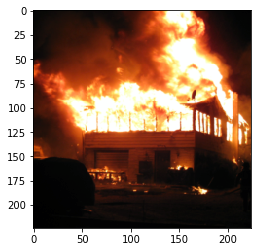

predicted: wood; High Hazard


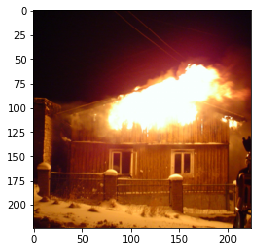

In [3]:
# visualize
model_final = torch.load('./model_final_new.pt')
material_classifier.visualize(model_final, load_baseline_model=True)

In [4]:
nb_classes = 4

# Confusion matrix
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model_final(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(torch.t(torch.t(confusion_matrix)/torch.sum(confusion_matrix, dim=1)))
# Percentage Accuracy for each class
# fabric, metal, stone, wood
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([[0.6000, 0.2000, 0.0000, 0.2000],
        [0.0000, 0.6667, 0.0000, 0.3333],
        [0.0000, 0.0000, 0.7500, 0.2500],
        [0.0000, 0.0000, 0.0000, 1.0000]])
tensor([0.6000, 0.6667, 0.7500, 1.0000])
